In [1]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from dataset import SatelliteDataset
import matplotlib.pyplot as plt
import numpy as np


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = SatelliteDataset(root_dir='Train', transform=transform)
test_dataset = SatelliteDataset(root_dir='Test', transform=transform)

print(len(train_dataset))
print(len(test_dataset))

5200
1301


In [3]:
for i in range(len(train_dataset)):
    image, label = train_dataset[i]

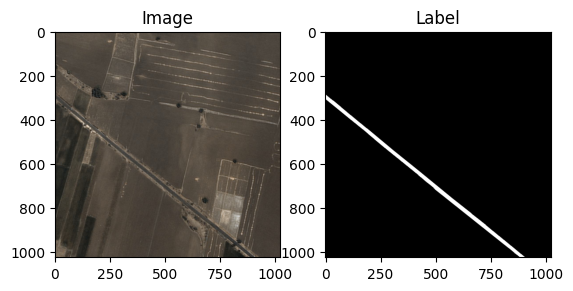

In [4]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

image, label = train_dataset[0]
image = np.array(image.permute(1, 2, 0))
image = image * std + mean
image = np.clip(image, 0, 1)

label = np.array(label)

# 在第一个子图中显示图像
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Image')

# 在第二个子图中显示标签
plt.subplot(1, 2, 2)
plt.imshow(label, cmap='gray')
plt.title('Label')

# 显示图形
plt.show()

In [5]:
# 创建一个空的集合来存储尺寸
sizes = set()

# 遍历数据集中的所有样本
for i in range(len(train_dataset)):
    # 获取样本
    image, _ = train_dataset[i]
    # 获取图像的尺寸
    size = image.shape[:]  # 注意：我们只关心图像的高度和宽度，所以我们忽略了通道维度
    # 将尺寸添加到集合中
    sizes.add(size)

# 将集合转换为列表
sizes = list(sizes)

# 计算最大和最小的尺寸
max_size = max(sizes)
min_size = min(sizes)

print('Unique sizes:', sizes)
print('Max size:', max_size)
print('Min size:', min_size)

Unique sizes: [torch.Size([3, 1024, 1024]), torch.Size([3, 400, 400])]
Max size: torch.Size([3, 1024, 1024])
Min size: torch.Size([3, 400, 400])
